In [6]:
from genetic_algorithm.GA import GeneticAlgorithm as GA
from TabuSearch.TS import TabuSearch as TS
from TabuSearch.utils import *
from Simulated_Annealing.Simulated_Annealing import SimulatedAnnealing as SA
from Simulated_Annealing.utils import * 


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import functools

# Leer grafo Instancia 1 : 10 nodos

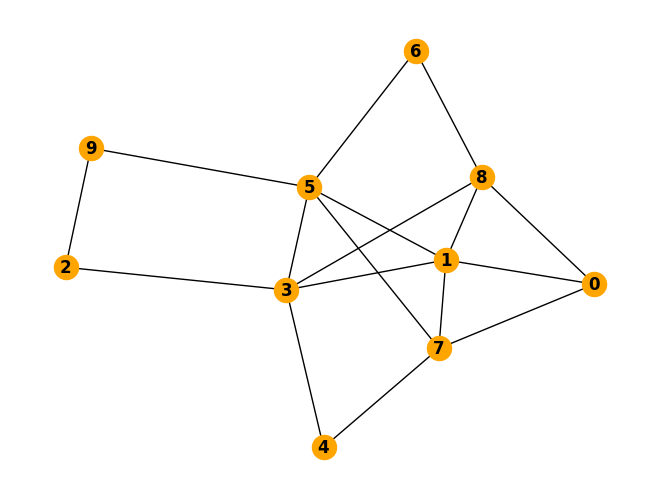

In [7]:
import csv
graph = []
with open('instancias/10nodos.csv', 'r', newline='') as file:
    myreader = csv.reader(file, delimiter=',')
    for row in myreader:
        # Convierte cada elemento de la fila en un entero
        int_row = [int(cell) for cell in row]
        graph.append(int_row)
graph = np.array(graph)
n = len(graph)
G = nx.from_numpy_array(graph)
nx.draw(G, with_labels=True, node_color='orange', font_weight='bold')
plt.show()

# Funcion de Costo

In [8]:

def graph_coloring(solucion, graph):
	ncolores=len(set(solucion))
	conflicts = 0
	for u, v in graph.edges():
		if solucion[u] == solucion[v]:
			conflicts += 1
	return conflicts + ncolores

fn = functools.partial(graph_coloring,graph =G)

## Prueba 1

### Parametros Simulated Annealing

In [9]:
parametrosSA = {
    "stopping_criteria_type": "function_calls",
    "max_call_functions": 10000,
    "problem_type": "COP",
    "codification": "combination",
    "cooling": "geometric",
    "min_or_max":"min",
    "limits": (1, n),
    "precision": 1,
    "variables":1,
    "alpha": 0.99,
    "beta": 0.8,
    "time": 1,
    "equilibrium": 1,
    "temperature": 600,
    "final_temperature": 0.01,
}

### Parametros TabuSearch

In [10]:
first_solution = create_first_solution("combination", n)
parametrosTS = {
    "first_point":first_solution,
    "tabu_list_size":20,
    "number_of_points": 200,
    "diversification_type": "static",
	"diversification_size": 100,
    "stopping_criteria_type":"function_calls",
    "max_call_functions": 10000,
    "long_term_memory_reset" : True,
    "problem_type": "COP",
	"min_or_max": "min",
    "codification": "combination"
}

### Parametros Genetic Algorithm

In [11]:
parametrosGA = {
    "stopping_criteria_type":"function_calls",
    "max_call_functions": 10000,
    "population_size": 100,
    "selection_operator": "tournament",
    "crossover_operator": "onepoint",
    "mutation_operator":"swap",
    "problem_type": "COP",
    "limits":(0,n),
	"min_or_max": "min",
    "codification": "combination"
}

### Metaheuristicas

In [ ]:
# Simulated_Annealing
sa = SA(**parametrosSA)
sa.fit(fn)

# TabuSearch
ts = TS(**parametrosTS)
ts.fit(fn)

# Genetic Algorithm
ga = GA(**parametrosGA)
ga.evolve(fn)

